In [1]:
%load_ext autoreload
%matplotlib inline

In [13]:
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import xarray as xr

import os,sys,glob
import re

# Specific to this script
from ipywidgets import *
import ipywidgets as widgets

## Add own library to path
workdir = os.getcwd()
repodir = workdir
projectname = 'EUREC4A'
while os.path.basename(repodir) != projectname:
    repodir = os.path.dirname(repodir)
print('repo:',repodir)
thismodule = sys.modules[__name__]
## Own functions
moduledir = os.path.join(repodir,'functions')
sys.path.insert(0,moduledir)
print("Own modules available:", [os.path.splitext(os.path.basename(x))[0]
                                 for x in glob.glob(os.path.join(moduledir,'*.py'))])
# local input directory
# localinputdir = os.path.join(repodir,'inputdata')
inputdir = '/Users/bfildier/Data/EUREC4A/HALO'
figdir = os.path.join(repodir,'figures')
moviedir = os.path.join(repodir,'movies')

## Graphical parameters
plt.style.use(os.path.join(matplotlib.get_configdir(),'stylelib/presentation.mplstyle'))

repo: /Users/bfildier/Code/analyses/EUREC4A
Own modules available: []


In [195]:
inputsubdir = os.path.join(inputdir,'Processed_sondes_24012020')
inputfiles = glob.glob(os.path.join(inputsubdir,'D*.nc'))
inputfiles.sort()

In [202]:
i_t = 23

In [214]:
data = [None] * len(inputfiles)

g = 0

for i in inputfiles :
    data[g] = xr.open_dataset(i).dropna(dim='time',subset=['time']).swap_dims({'time':'alt'}).reset_coords().dropna(dim='alt',subset=['alt','pres','u_wind','v_wind','lat','lon','mr'],
                         how='any').\
                  interp(alt=np.arange(0,9100,10))
    g = g + 1

In [174]:
from mpl_toolkits import mplot3d

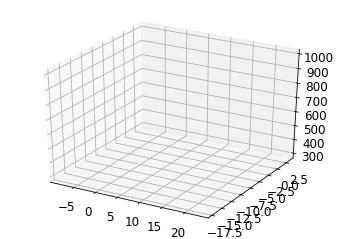

In [206]:
i_s = 23

fig = plt.figure()
ax = plt.gca(projection='3d')

ax.plot(data.u_wind,data.v_wind,data.pres.values)



# Import from WorldView

In [173]:
date = '2020-01-24'
time = '12:50:00'
coords = "%f,%f,%f,%f"%(latmin,lonmin,latmax,lonmax)
url = 'https://wvs.earthdata.nasa.gov/api/v1/snapshot?REQUEST=GetSnapshot&TIME='+\
    date+'T'+time+'Z&BBOX='+coords+'&CRS=EPSG:4326&LAYERS=GOES-East_ABI_Band2_Red_Visible_1km,Coastlines,Reference_Labels&WRAP=x,x,x&FORMAT=image/png&WIDTH=4127&HEIGHT=2924&ts=1580230806068'

In [146]:
# import urllib
# snapshot = urllib.request.urlopen(url)

In [148]:
# print(snapshot)

# Add circle to movie

In [121]:
movie_inname = 'nasa-worldview-2020-01-24T09_00Z-to-2020-01-24T14_51Z.gif'

In [307]:
print('coordinates')

# offset
# dlon_off = 13.1431-13.55+0.5
# dlat_off = -59.4232+59.5-0.5
dlon_off = 0
dlat_off = 0

# Image box
lonmin,lonmax = -60.02+dlon_off,-55.5+dlon_off
dlon = lonmin-lonmax
latmin,latmax = 12.1+dlat_off,14.86+dlat_off
dlat = latmin-latmax
# aspect = dlon/dlat

# HALO circle
lon_circle, lat_circle = -57.717,13.3
# lon_circle, lat_circle = -57.717+dlon_off,13.3+dlat_off
lon_pt, lat_pt = -57.245,14.1903
# lon_pt, lat_pt = -57.245+dlon_off,14.1903+dlat_off
r_circle = np.sqrt((lon_pt-lon_circle)**2+(lat_pt-lat_circle)**2)

coordinates


In [303]:
from PIL import Image,ImageSequence
from matplotlib.patches import Circle

im = Image.open(os.path.join(moviedir,movie_inname))

frames = []
for frame in ImageSequence.Iterator(im):
    frames.append(frame)



FileNotFoundError: [Errno 2] No such file or directory: '/Users/bfildier/Code/analyses/EUREC4A/movies/nasa-worldview-2020-01-24T09_00Z-to-2020-01-24T14_51Z.gif'

In [308]:
files = glob.glob(os.path.join(moviedir,'temp/frame-*.png'))
Nt = len(files)

In [325]:
## THIS ONE WORKS

print('import individual frames instead')

# # Over space within a circle
# # index in dropsonde data
# j_1145 = 21
# j_1155 = 23
# j_1200 = 24
# j_s = [j_1145,j_1155,j_1200]
# # index in gif
# i_1145 = 10
# i_1155 = 11
# i_1200 = 12
# i_s = [i_1145,i_1155,i_1200]

# Over time across circles
# index in dropsonde data
j_11_55 = 23
j_12_55 = 33
j_13_55 = 42
j_14_55 = 52
j_15_55 = 62
j_s = [j_11_55,j_12_55,j_13_55,j_14_55,j_15_55]
# index in gif
i_11_55 = 11
i_12_55 = 17
i_13_55 = 23
i_14_55 = 29
i_15_55 = 35
i_s = [i_11_55,i_12_55,i_13_55,i_14_55,i_15_55]

col_during = 'g'

N_end = Nt
# N_end = 18

for step in range(N_end):
# for step in (12,):
    
    file = '/Users/bfildier/Code/analyses/EUREC4A/movies/temp/frame-%d.png'%step

    frame = Image.open(file)

    fig,ax = plt.subplots(1,figsize=(20,10))

    # show frame
    h = ax.imshow(frame,aspect=1)
    h.set_extent([lonmin,lonmax,latmin,latmax])

    # add circle
    circ = Circle((lon_circle,lat_circle),r_circle,linewidth=2,ec='r',fill=False)
    ax.add_patch(circ)

    # add grid
    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
    ax.grid(color='w', linestyle='-', linewidth=0.5)

    # add sondes
    i_lon = [np.nanmean(data[j].lon) for j in j_s]
    i_lat = [np.nanmean(data[j].lat) for j in j_s]
#     ax.scatter(x=i_lon,y=i_lat)
#     print(i_lon,i_lat)
    
    for i_sonde,lon_sonde,lat_sonde in zip(i_s,i_lon,i_lat):
        
        if step == i_sonde:
            col = col_during
        else:
            col = 'r'
            
        circ = Circle((lon_sonde,lat_sonde),0.03,linewidth=2,ec=col,fc=col)
        ax.add_patch(circ)
    
#     # remove axes
#     ax.xaxis.set_ticklabels([])
#     ax.xaxis.set_ticks_position('none')
#     ax.yaxis.set_ticklabels([])
#     ax.yaxis.set_ticks_position('none')


    plt.savefig(os.path.join(figdir,'forGIF/frame_%s.png'%(str(step).rjust(3, '0'))),bbox_inches='tight')
    plt.close()
#     plt.show()
#     


import individual frames instead


In [323]:
# from matplotlib.animation import FuncAnimation

# fig,ax = plt.subplots(1,figsize=(20,10))

# def update(i):

#     file = '/Users/bfildier/Code/analyses/EUREC4A/movies/temp/frame-%d.png'%step
#     frame = Image.open(file)
    
#     # show frame
#     h = ax.imshow(frame,aspect=1)
#     h.set_extent([lonmin,lonmax,latmin,latmax])

#     # add circle
#     circ = Circle((lon_circle,lat_circle),r_circle,linewidth=2,ec='r',fill=False)
#     ax.add_patch(circ)

#     # add grid
#     ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
#     ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
#     ax.grid(color='w', linestyle='-', linewidth=0.5)

#     # remove axes
#     ax.xaxis.set_ticklabels([])
#     ax.xaxis.set_ticks_position('none')
#     ax.yaxis.set_ticklabels([])
#     ax.yaxis.set_ticks_position('none')
    
# anim = FuncAnimation(fig, update, frames=np.arange(Nt-10, Nt), interval=200)

# # save
# anim.save(os.path.join(moviedir,'movie.gif'), dpi=80, writer='imagemagick')

In [324]:
# import matplotlib.ticker as ticker

# fig,ax = plt.subplots(1,figsize=(20,10))

# # show frame
# h = ax.imshow(frames[step],aspect=1)
# h.set_extent([lonmin,lonmax,latmin,latmax])

# # add circle
# circ = Circle((lon_circle,lat_circle),r_circle,linewidth=2,ec='r',fill=False)
# ax.add_patch(circ)

# # add grid
# ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
# ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
# ax.grid(color='w', linestyle='-', linewidth=0.5)

# # remove axes
# ax.xaxis.set_ticklabels([])
# ax.xaxis.set_ticks_position('none')
# ax.yaxis.set_ticklabels([])
# ax.yaxis.set_ticks_position('none')


# # plt.savefig(os.path.join(figdir,'forGIF/frame_%s.png'%(str(step).rjust(3, '0'))),bbox_inches='tight')
# # plt.show()


In [118]:
import matplotlib.ticker as ticker


for step in range(len(frames)):

    fig,ax = plt.subplots(1,figsize=(20,10))

    # show frame
    h = ax.imshow(frames[step],aspect=1)
    h.set_extent([lonmin,lonmax,latmin,latmax])

    # add circle
    circ = Circle((lon_circle,lat_circle),r_circle,linewidth=2,ec='r',fill=False)
    ax.add_patch(circ)

    # add grid
    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
    ax.grid(color='w', linestyle='-', linewidth=0.5)

    # remove axes
    ax.xaxis.set_ticklabels([])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticklabels([])
    ax.yaxis.set_ticks_position('none')


    plt.savefig(os.path.join(figdir,'forGIF/frame_%s.png'%(str(step).rjust(3, '0'))),bbox_inches='tight')
    plt.close()
